<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Investigaciones-de-operaciones-/blob/main/Inventario_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Inventario con descuento

LubeCar se especializa en cambios rápidos de aceite para motor de automóvil. El servicio compra aceite para motor a granel $\$3$, a por  galón. Si LubeCar compra más de 100 galones, obtiene un descuento de $\$2.50$ por galón. En el servicio se atienden unos 150 autos diarios, y cada cambio de aceite requiere de 1.25 galones. LubeCar guarda el aceite a granel con un costo de $\$0.02$ por galón y por día. También, el costo de colocar un pedido de aceite a granel es de $\$20$.Hay un tiempo de 2 días para la entrega. Determine la política óptima de inventario.

In [139]:
#Importación de librerías
import sympy as sp #Para cálculo simbólico
import matplotlib.pyplot as plt #Para visualización
import numpy as np # Para operaciones numéricas


#Definimos los simbolos y funciones

In [140]:
c1,c2,d,h,k,L,Q,Qop,t1= sp.symbols("c1,c2,d,h,k,L,Q,Qop,t1") # Crear variables simbólicas para los parámetros del modelo
T = sp.Function('T') # Definimos a T como función simbólica
Qo = sp.Function("Qo") # Definimos a Qo como función simbólica

#Datos del problema

In [141]:
c1= 3 # Costo unitario sin descuento
c2= 2.5 # Costo unitario con descuento
d= 187.5 # Demanda anual
h= 0.02 # Costo de mantenimiento por unidad por año
k= 20 # Costo de preparación del pedido
L= 2 # Tiempo de entrega en años
q= 1000 # Cantidad mínima para obtener descuento

##Paso 1 Calculamos Q Optimo ($Q^*$)

In [142]:
def Qop(k,d,h):  # Definir función para calcular Q óptimo
  return np.sqrt((2*k*d)/h) # Aplicar fórmula EOQ: sqrt(2*k*d/h)


In [143]:
Qo = Qop(k,d,h) # Calcular Qo llamando a la función Qop con los parámetros dados

In [144]:
Qo # Mostrar resultado

np.float64(612.3724356957945)

##Paso 2. Determinamos la zona donde se encuentra $q$

In [145]:
def T(Q): # Definir función de costo total T(Q) que cambia según región# Definir función de costo total T(Q) que cambia según región
  if Q<=q:  # Si Q es menor o igual a q (umbral de descuento)
    f=c1*d + (k*d)/Q + (h*Q)/2 # Calcular costo total con precio c1 (sin descuento)
  else:
    f =c2*d + (k*d)/Q + (h*Q)/2 # Calcular costo total con precio c2 (con descuento)
  return f

In [146]:
eq = sp.Eq(Q**2 +(2/h)*(c2*d-T(Qo))*Q+(2*k*d)/h,0) # La ecuación se deriva de igualar T(Q) con el costo en Qo

In [147]:
eq # Mostrar ecuación simbólica

Eq(Q**2 - 10599.7448713916*Q + 375000.0, 0)

In [148]:
sol=sp.solve(eq,Q) # Resolver la ecuación cuadrática para Q

In [149]:
sol # Mostrar soluciones

[35.4970848447485, 10564.2477865469]

In [150]:
s=sol[1] #Aquí debemos seleccionar la solución que sea mayor que q

In [151]:
s # Mostrar la solución seleccionada

10564.2477865469

#Como $$Qop = 612 < q = 1000 < Q = 10564$$ , $q$ es ta en la zona $II$. Por lo tanro $Qop = q$  

Ejercicio 1: Escriba una función que calcula la Q óptima. Es decir, que resuelva de manera interna la ecuación cuadrática y seleccione la solución correcta e indique en qué región está.

In [152]:
def calcular_Q_optima(c1, c2, k, d, h, q): # Definir función que calcula la cantidad económica óptima
    # Calcular Q óptima sin considerar descuento
    Q_op = np.sqrt((2 * k * d) / h)

    # Calcular costos totales en diferentes puntos
    if Q_op <= q:
        # Calcular costos para ambas opciones
        costo_Qop = c1 * d + (k * d) / Q_op + (h * Q_op) / 2 # Calcular el costo total en Q_op usando el costo unitario c1 (sin descuento)
        costo_q = c2 * d + (k * d) / q + (h * q) / 2 # Calcular el costo total en q usando el costo unitario c2 (con descuento)

        # Comparar los costos para decidir qué cantidad es más económica
        if costo_Qop <= costo_q: # Si Q_op es más económica, devolverla como óptima en región 1
            return Q_op, 1  # Q en región 1 (sin descuento)
        else:
            return q, 2  # Q en región 2 (con descuento)
    else:
        # Calcular costos para ambas opciones
        costo_q = c1 * d + (k * d) / q + (h * q) / 2
        costo_Qop = c2 * d + (k * d) / Q_op + (h * Q_op) / 2

        if costo_q <= costo_Qop:
            return q, 1  # Q en región 1 (con descuento)
        else:
            return Q_op, 2  # Q en región 2 (con descuento)

Q_opt, region = calcular_Q_optima(c1, c2, k, d, h, q)
print(f"Q óptima: {Q_opt:.2f}")
print(f"Región: {region}")
print(f"Tipo de región: {'Q ≤ q (sin descuento)' if region == 1 else 'Q > q (con descuento)'}")

Q óptima: 1000.00
Región: 2
Tipo de región: Q > q (con descuento)


#Para calcular el tiempo de retraso efectivo

In [153]:
t1=Qo/d # Calcular tiempo de ciclo

In [154]:
t1 # Mostrar tiempo de ciclo

np.float64(3.2659863237109037)

In [155]:
np.floor(L/t1)  # Calcular cuántos ciclos completos caben en el tiempo de entrega L

np.float64(0.0)

Por tanto la política del inventario debe ser:

In [156]:
print("Pedir", q, "cuando el inventario caiga a:", L*d)

Pedir 1000 cuando el inventario caiga a: 375.0


Ejercicio 2: Escribir una función que reciba los datos del problema y devuelva la política óptima del inventario.

In [157]:
def politica_optima_inventario(c1, c2, k, d, h, q, L):
    # Calcular Q óptima usando la función del ejercicio 1
    Q_opt, region = calcular_Q_optima(c1, c2, k, d, h, q)

    # Calcular punto de reorden
    ROP = d * L

    # Calcular tiempo de ciclo
    t_ciclo = Q_opt / d  # en años

    # Determinar cuántos ciclos completos hay en el tiempo de entrega
    ciclos_en_L = int(np.floor(L / t_ciclo)) if t_ciclo > 0 else 0

    # Crear diccionario con la política óptima
    politica = {
        'cantidad_pedido': Q_opt,
        'punto_reorden': ROP,
        'region': region,
        'tipo_costo': c1 if region == 1 else c2,
        'tiempo_ciclo': t_ciclo * 365,  # convertir a días
        'ciclos_en_entrega': ciclos_en_L
    }

    return politica

def mostrar_politica(politica):
    """
    Muestra la política de inventario de forma legible
    """
    print("=" * 50)
    print("POLÍTICA ÓPTIMA DE INVENTARIO")
    print("=" * 50)
    print(f"Cantidad a pedir (Q*): {politica['cantidad_pedido']:.2f} unidades")
    print(f"Punto de reorden (ROP): {politica['punto_reorden']:.2f} unidades")
    print(f"Costo unitario aplicado: ${politica['tipo_costo']:.2f}")
    print(f"Tiempo de ciclo: {politica['tiempo_ciclo']:.2f} días")
    print(f"Ciclos completos en tiempo de entrega: {politica['ciclos_en_entrega']}")
    print(f"Región: {politica['region']} ({'Q ≤ q' if politica['region'] == 1 else 'Q > q'})")
    print("\nInstrucción práctica:")
    print(f"Pedir {politica['cantidad_pedido']:.0f} unidades cuando el inventario alcance {politica['punto_reorden']:.0f} unidades")
    print("=" * 50)

# Prueba de la función con los datos del ejemplo
politica = politica_optima_inventario(c1, c2, k, d, h, q, L)
mostrar_politica(politica)



POLÍTICA ÓPTIMA DE INVENTARIO
Cantidad a pedir (Q*): 1000.00 unidades
Punto de reorden (ROP): 375.00 unidades
Costo unitario aplicado: $2.50
Tiempo de ciclo: 1946.67 días
Ciclos completos en tiempo de entrega: 0
Región: 2 (Q > q)

Instrucción práctica:
Pedir 1000 unidades cuando el inventario alcance 375 unidades


La grafica

In [158]:
def T(Q,c1,c2,h,k,d): # Definir función vectorizada para calcular costo total T(Q)
 Q = np.array(Q) # Convertir Q a array numpy para operaciones vectorizadas

# Determinar qué costo aplicar según posición de Q respecto a q
 c = np.where(Q <= q, c1, c2) #opciones

 return c*d + (k*d)/Q + (h*Q)/2# Calcular y retornar costo total usando fórmula EOQ


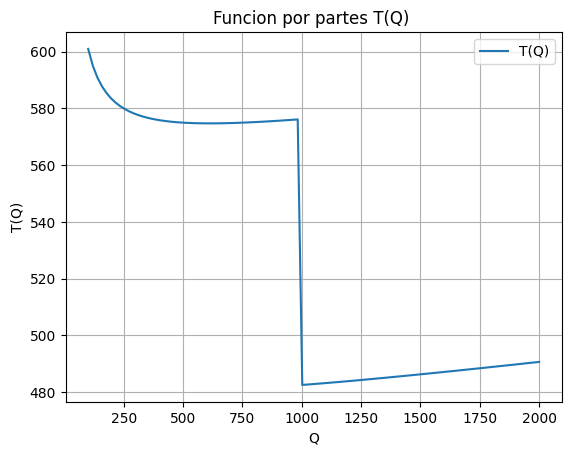

In [159]:
Q_vals = np.linspace(100, 2000, 100) # Crear array de valores de Q desde 100 hasta 2000 con 100 puntos

T_vals = T(Q_vals,c1,c2,h,k,d) # Calcular valores de costo total para cada Q
plt.plot(Q_vals, T_vals, label='T(Q)') # Crear gráfico de línea
plt.xlabel('Q') # Etiquetar eje X
plt.ylabel('T(Q)') # Etiquetar eje y
plt.title('Funcion por partes T(Q) ') # Agregar título al gráfico
plt.legend() # Mostrar leyenda
plt.grid(True) # Activar cuadrícula en el gráfico
plt.show() # Mostrar el gráfico

